In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model_TBF as model
import solvers_TBF as solvers

In [2]:
mesh, BCs = geometry.getBar()
coordinates, connectivity = mesh["coordinates"], mesh["connectivity"]

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(1, 0, 1, 1, 0.0001)
modelA.section.setProperties(1)
modelA.setBoundaryConditions(BCs)

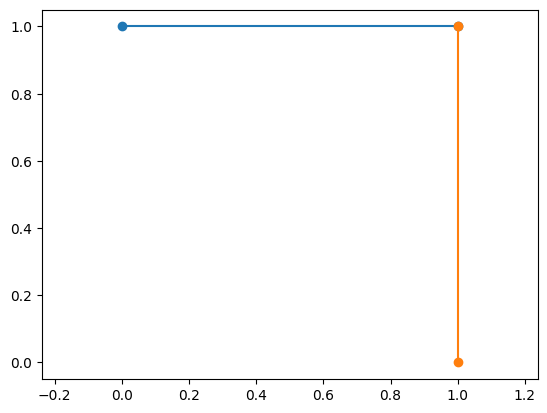

In [3]:
modelA.plotUndeformed()

In [4]:
# Compute Rayleigh coefficients
Zetas, Omegas  = [0, 0], [1.2247, 1.2247+1e-8]
alphaR, betaR = model.Damping.getRayleighCoeffs(Zetas, Omegas)
## if omega1==omega2 the matrix to invert is singular -> very sligthly increase one of them


In [5]:
solver = solvers.Dynamic()
solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)
solver.setControlElement(0)

In [6]:
# Select excitation case study
variation = 2

if variation == 1:
    modelA.damping.setRayleighParameters(alphaR, betaR)
    solver.setConstraint("Constant")
    nsteps, dt, Amp = 500, 0.1, 0.7
    t = np.arange(0, nsteps * dt, dt)
elif variation == 2:
    solver.setConstraint("IncreasingLoad")
    modelA.damping.setRayleighParameters(alpha=0.4, beta=0.4)
    nsteps, dt, Amp = 500, 0.1, 0.04
    t = np.arange(0, nsteps * dt, dt)


u, se = solver.solve(modelA, t, dt, Amp)

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.762e-16
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.867e-17
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.233e-16
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.624e-16
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.227e-16
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 4.993e-17
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 9.254e-17
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 8.795e-17
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 4.267e-16
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.528e-16
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 8.451e-17
Step 12
  Attempt 1

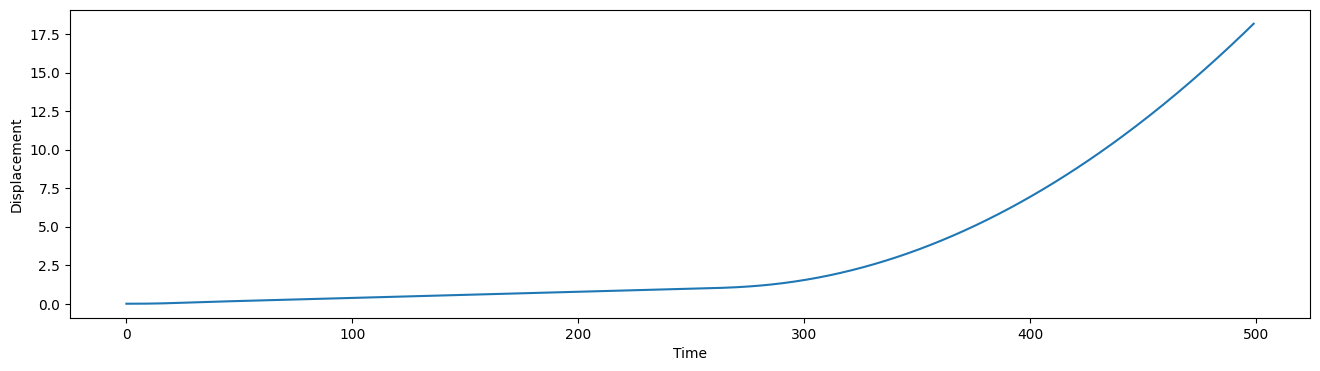

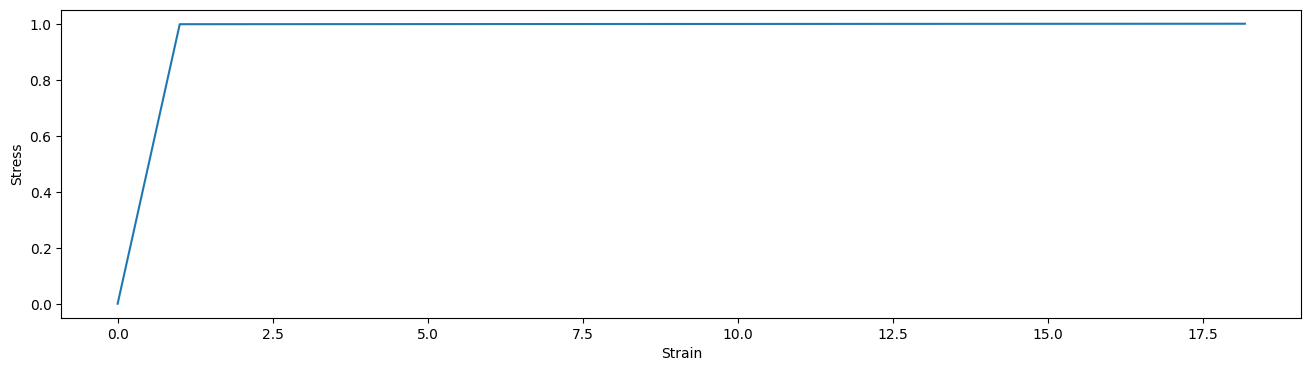

In [7]:
#Plot displacement response
plt.figure(figsize=(16, 4))
plt.plot(u[2, :])
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

#Plot stress-strain time history
plt.figure(figsize=(16, 4))
plt.plot(se[1, :], se[0, :])
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.show()

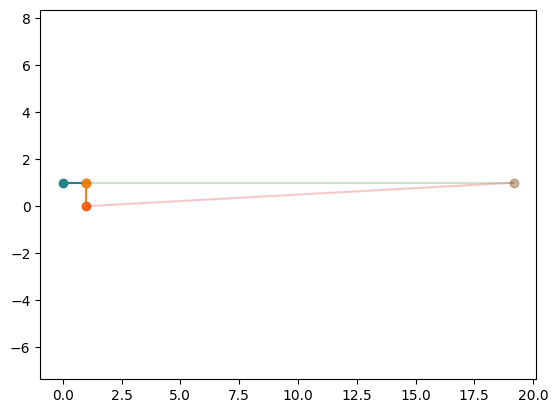

In [8]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)